<a href="https://colab.research.google.com/github/bitanb1999/NLP_Univ_Project/blob/main/Abstractive_Summarisation_with_Vanilla_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstractive Summarisation using Vannila LSTM:

### **What are LSTMs?**
LSTMs deal with both Long Term Memory (LTM) and Short Term Memory (STM) and for making the calculations simple and effective it uses the concept of gates.

Forget Gate: LTM goes to forget gate and it forgets information that is not useful.
Learn Gate: Event ( current input ) and STM are combined together so that necessary information that we have recently learned from STM can be applied to the current input.
Remember Gate: LTM information that we haven’t forget and STM and Event are combined together in Remember gate which works as updated LTM.
Use Gate: This gate also uses LTM, STM, and Event to predict the output of the current event which works as an updated STM.

### **Why are we using LSTM layers for Abstractive Summarisation?**
Long short term memory neural networks (for short LSTM) are a kind of recurrent neural network particularly fitted to sequence prediction problems because they are able to learn order dependencies. They have an internal state that represents context information: they keep “in mind” inputs for a certain, not a priori fixed amount of time, and they can thus generate outputs based on contextual flexible information, because they depend not only on the current state but also on previous inputs. Classical recurrent neural networks (RNN) are not capable of correctly handling the problem (referred to as the “vanishing gradient problem”) represented by the impact of each given input on the network, which can unpredictably be insignificant or massive. LSTM networks were designed to solve this problem and they are so capable of handling successfully “sequential processing task in which we suspect that a hierarchical decomposition may exist, but do not know in advance what this decomposition is” (Felix A. Gers, et al., Learning to Forget: Continual Prediction with LSTM, 2000), just like a text in which the comprehension of what is being said may depend on what is written before but also on what lies ahead in a continuous going back and forth.

For this reason, LSTM networks perform extremely well on complicated problems like speech recognition, translation, speech synthesis, audio and video analysis, and abstractive summarization where there is a high, complex hierarchy between one part of a text or of a sentence and another part.

***The LSTM architechture***

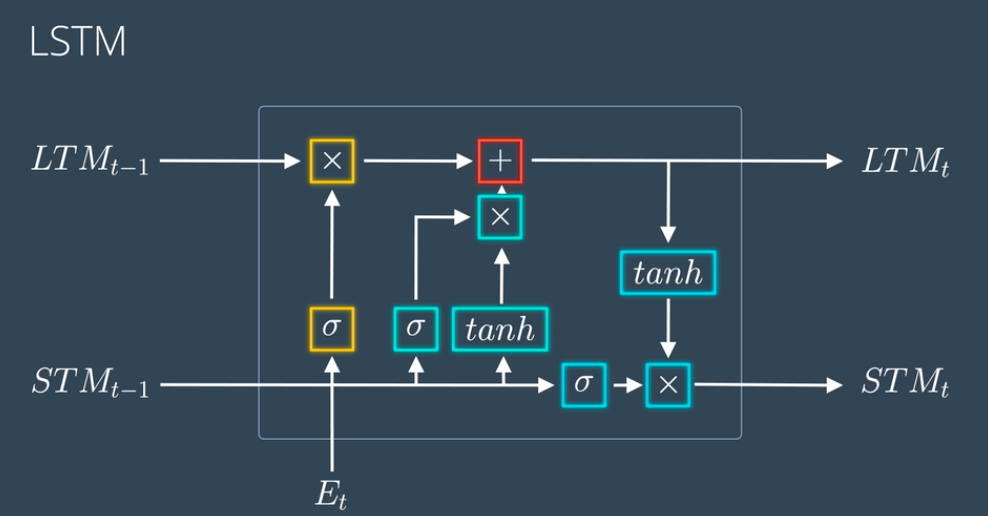

#### Requirements:

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, GRU, Embedding, Dense,Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

#### Dataset:

In [ ]:
df=pd.read_csv("/home/wikihowAll.csv")[:4000]

In [ ]:
unique_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
#clean data using helper code
import re
def transform(summary):
    # Lower case
    summary = summary.lower()
    summary=summary.replace('\n',' ')
    # Remove HTML
    summary = re.sub('<br /><br />', ' ', summary)
       
    # Replace all non-alphanumeric characters with spaces
    summary = re.sub(r'[^a-zA-Z0-9\s]', '', summary)
    # removing contractions
    summary=' '.join([unique_mapping[t] if t in unique_mapping else t for t in summary.split(" ")]) 
    
    return summary

In [ ]:
df['headline']=df['headline'].apply(lambda x:transform(str(x)))
df['text']=df['text'].apply(lambda x:transform(str(x)))

In [ ]:
df.head()

,headline,title,text
0,keep related supplies in the same area make a...,How to Be an Organized Artist1,if youre a photographer keep all the necessar...
1,create a sketch in the neopoprealist manner o...,How to Create a Neopoprealist Art Work,see the image for how this drawing develops s...
2,get a bachelors degree enroll in a studiobase...,How to Be a Visual Effects Artist1,it is possible to become a vfx artist without...
3,start with some experience or interest in art...,How to Become an Art Investor,the best art investors do their research on t...
4,keep your reference materials sketches articl...,How to Be an Organized Artist2,as you start planning for a project or work y...


In [ ]:
#we consider only the headline and text
df=df[['headline','text']]

In [ ]:
df['headline']=df['headline'].apply(lambda x: 'sostok '+str(x)+' eostok')

In [ ]:
#truncating to 63rd percentile
max_length=509
max_len_headlines=128

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['text'],df['headline'],test_size=0.2,random_state=1,shuffle=True)

#### Tokenizer:

In [ ]:
#Find the percentage of occurrence of rare words in the text.
thresh = 5

count = 0
tot_count = 0
x_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=tot_count,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=True,
)
x_tokenizer.fit_on_texts(list(x_tr))

for key, value in x_tokenizer.word_counts.items():
    tot_count = tot_count + 1
    if value < thresh:
        count = count + 1
    
print("% of rare words in vocabulary: ", (count / tot_count) * 100)

% of rare words in vocabulary:  71.39382694381065


In [ ]:
tot_count

39883

In [ ]:
# # Prepare a tokenizer
x_tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=tot_count,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=True,
)
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = tf.keras.preprocessing.sequence.pad_sequences(x_tr_seq,  maxlen=max_length, padding='post')
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val_seq, maxlen=max_length, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 39884


In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

count = 0
tot_count = 0

for key, value in y_tokenizer.word_counts.items():
    tot_count = tot_count + 1
    if value < thresh:
        count = count + 1
    
print("% of rare words in vocabulary:",(count / tot_count) * 100)

# Prepare a tokenizer
y_tokenizer = Tokenizer(num_words=tot_count) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = tf.keras.preprocessing.sequence.pad_sequences(y_tr_seq, maxlen=max_len_headlines, padding='post')
y_val = tf.keras.preprocessing.sequence.pad_sequences(y_val_seq, maxlen=max_len_headlines, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 71.404821280133
Size of vocabulary in Y = 10828


In [ ]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    count = 0
    for j in y_tr[i]:
        if j != 0:
            count = count + 1
    if count == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

#### Model:

In [ ]:
from keras import backend as K 
K.clear_session()

latent_dim = 200
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_length,))

#embedding layer
encoder_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Setting up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
decoder_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
decoder_emb = decoder_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 509)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 509, 100)     3988400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 509, 200),   240800      ['embedding[0][0]']              
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=100,
    callbacks=[es],
    batch_size=256,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/100
13/13 [==============================] - 104s 7s/step - loss: 6.0032 - val_loss: 3.1432
Epoch 2/100
13/13 [==============================] - 96s 7s/step - loss: 3.2119 - val_loss: 2.8494
Epoch 3/100
13/13 [==============================] - 95s 7s/step - loss: 3.0844 - val_loss: 2.7878
Epoch 4/100
13/13 [==============================] - 97s 8s/step - loss: 3.1447 - val_loss: 2.6456
Epoch 5/100
13/13 [==============================] - 96s 7s/step - loss: 2.9454 - val_loss: 2.5073
Epoch 6/100
13/13 [==============================] - 96s 7s/step - loss: 2.7141 - val_loss: 2.4266
Epoch 7/100
13/13 [==============================] - 97s 7s/step - loss: 2.6674 - val_loss: 2.4181
Epoch 8/100
13/13 [==============================] - 98s 8s/step - loss: 2.6419 - val_loss: 2.3747
Epoch 9/100
13/13 [==============================] - 98s 8s/step - loss: 2.6193 - val_loss: 2.3656
Epoch 10/100
13/13 [==============================] - 96s 7s/step - loss: 2.6003 - val_loss: 2.3442
Epoch 11

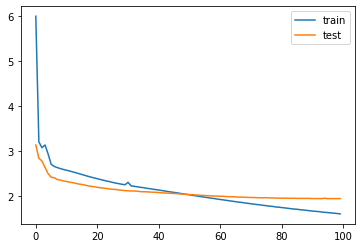

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.save("lstm_seq2seq_vanilla.h5")

### Inference:

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Inference Models for understanding our outputs where the prediction takes place using the context vector

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_length,latent_dim))

# Get the embeddings of the decoder sequence
decoder_emb2= decoder_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def intepreting_sequence(input_seq):

    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_len_headlines-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# To summarise
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# for sequences to texts
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
seqtxt=[]
seqsum=[]
predsum=[]
for i in range(0,3):
    print ('Review:', seq2text(x_tr[i]))
    seqtxt.append(seq2text(x_tr[i]).split(" "))
    print ('\n')
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('\n')
    seqsum.append(seq2summary(y_tr[i]).split(" "))
    predicted=intepreting_sequence(x_tr[i].reshape(1,max_length))
    print ('Predicted summary:',predicted)
    predsum.append(predicted)
    print ('\n')

Review: because of this it is recommended to increase your intake of vitamin c while you are dealing with a virusaside from taking a vitamin c supplement you can also eat fruits that have high amounts of vitamin c these include grapefruit kiwi strawberries lemon lime blackberries oranges papaya pineapple pomelo and raspberrieseat vegetables that are rich in vitamin c these include brussel sprouts broccoli onions garlic red and green peppers tomatoes and radishes you can also consider making vegetable soup if you dont like eating raw veggies if you have ever wondered why people always give their kids chicken noodle soup when they are sick its because chicken soup is a wonder when it comes to recovering from a virus not only does chicken soup act as an antiinflammatory it also temporarily helps to relieve congestion by unblocking your nasal passagesyou can also add onions garlic and other veggies to your soup to boost its vitamin and mineral count zinc governs enzymes in our body that ac

### BLEU Scores:

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
scores=0
for i in range(len(predsum)):
    reference = [predsum[i].split(" ")]
    candidate = seqsum[i]
    scores+= sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(scores/i)

0.1370351489441145


/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

### ROUGE Scores:

In [ ]:
!pip install rouge-score
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
scores=[]
for i in range(len(predsum)):
    reference = predsum[i]
    candidate = ' '.join(seqsum[i])
    print(scorer.score(reference,candidate)['rouge1'])
    scores.append(scorer.score(reference,candidate)['rouge1'])
#print(scores/i)

Score(precision=0.15, recall=0.15, fmeasure=0.15)
Score(precision=0.08333333333333333, recall=0.014285714285714285, fmeasure=0.024390243902439022)
Score(precision=0.09448818897637795, recall=0.42857142857142855, fmeasure=0.15483870967741936)


In [ ]:
np.mean([i[2] for i in scores])

0.10974298452661946